In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('AB_4A_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
414,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
415,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.829738


In [5]:
#Create the Input Feature
X = df.drop('pIC50', axis=1)

In [7]:
#Create the Output Feature
Y = df.pIC50


In [9]:
#Check Shape
X.shape

(417, 881)

In [10]:
#Check Shape
Y.shape

(417,)

In [11]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(417, 168)

# **Data Split**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((333, 168), (333,))

In [14]:
X_test.shape, Y_test.shape

((84, 168), (84,))

# **Building a Regression Model using Random Forest**

In [15]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6698840221939606

In [16]:
Y_pred = model.predict(X_test)

# **Scatter Plot of Experimental vs. Predicted Values**



<function matplotlib.pyplot.show(close=None, block=None)>

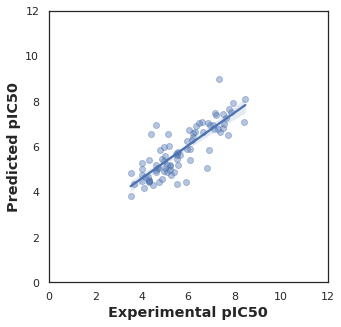

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show




